<a href="https://colab.research.google.com/github/MansiPokiya/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210-2023 Final Project


# Problem Statement

The dataset comprises information on individuals, including their gender, age, smoking habits, presence of yellow fingers, anxiety levels, peer pressure, chronic diseases, fatigue, allergies, wheezing, alcohol consumption, coughing, shortness of breath, swallowing difficulty, chest pain, and whether they have been diagnosed with lung cancer (binary: YES/NO). This dataset appears to be related to health and lifestyle factors, with a focus on respiratory health.

The problem statement for analysis is to identify factors that are strongly correlated with the presence of lung cancer among the individuals in the dataset. The goal is to gain insights into potential risk factors and patterns that contribute to the development of lung cancer. Through exploratory data analysis and statistical modeling, I aim to uncover significant relationships between certain attributes (such as smoking, chronic diseases, and age) and the likelihood of being diagnosed with lung cancer. Additionally, I plan to use machine learning techniques, such as classification algorithms, to build a predictive model that can assist in identifying individuals at a higher risk of developing lung cancer based on their characteristics. This analysis aims to contribute to the understanding of factors associated with lung cancer and provide a foundation for targeted preventive measures and interventions.

Lung Cancer/cancerpatient.xlsx source - https://www.kaggle.com/datasets/rishidamarla/cancer-patients-data?rvi=1

# Import  libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Convert Excel to CSV

I set the Excel file path to 'cancerpatient.xlsx'. Using pandas, I read the Excel file into a DataFrame named 'df'. Then, I specified the CSV output path as 'cancerPatients.csv' and saved the DataFrame to a CSV file. Finally, a success message was printed with the file's location.

In [114]:
excel_file_path_file_path = 'cancerpatient.xlsx'

# Read Excel file into a pandas DataFrame
df = pd.read_excel("cancerpatient.xlsx")

csv_output_path = 'cancerPatients.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_output_path, index=False)

print(f'Conversion successful. CSV file saved at: {csv_output_path}')

Conversion successful. CSV file saved at: cancerPatients.csv


I specified the paths for 'surveyLungCancer.csv' and 'cancerPatients.csv'. Using pandas, I read both CSV files into DataFrames 'df1' and 'df2'. Merging them based on the "Age" column, I created 'merged_df'. The merged data was saved as 'combined.csv', and a success message with the file's location was printed.

# Load the dataset

In [115]:
file1_path = 'surveyLungCancer.csv'
file2_path = 'cancerPatients.csv'

# Read CSV files into pandas DataFrames
df1 = pd.read_csv('surveyLungCancer.csv')
df2 = pd.read_csv('cancerPatients.csv')

# Merge DataFrames based on the "Age" column
merged_df = pd.merge(df1, df2, left_on='AGE', right_on='Age')

merged_output_path = 'combined.csv'

# Save the merged DataFrame to a CSV file
merged_df.to_csv(merged_output_path, index=False)

print(f'Merging successful. Merged CSV file saved at:{merged_output_path}')

Merging successful. Merged CSV file saved at:combined.csv


In [116]:
# Save merged dataset to JSON
merged_df.to_json("combined.json", orient="records", lines=True)

# Save merged dataset to XLSX
merged_df.to_excel("combined.xlsx", index=False)


In [117]:
"""
Read a CSV file and display basic information about the dataset.
"""

df = pd.read_csv('combined.csv')

# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GENDER                    1771 non-null   object
 1   AGE                       1771 non-null   int64 
 2   SMOKING                   1771 non-null   int64 
 3   YELLOW_FINGERS            1771 non-null   int64 
 4   ANXIETY                   1771 non-null   int64 
 5   PEER_PRESSURE             1771 non-null   int64 
 6   CHRONIC DISEASE           1771 non-null   int64 
 7   FATIGUE                   1771 non-null   int64 
 8   ALLERGY                   1771 non-null   int64 
 9   WHEEZING                  1771 non-null   int64 
 10  ALCOHOL CONSUMING         1771 non-null   int64 
 11  COUGHING                  1771 non-null   int64 
 12  SHORTNESS OF BREATH       1771 non-null   int64 
 13  SWALLOWING DIFFICULTY     1771 non-null   int64 
 14  CHEST PAIN              

# Data Transformation: Field-level transformations

I transformed 'YES' and 'NO' in the 'LUNG_CANCER' column to numeric values, replacing them with 1 and 0, respectively. Then, I created a new feature 'AGE_GROUP' by categorizing ages into bins and labeling them accordingly. I opted not to perform One-Hot Encoding for 'GENDER' and 'AGE_GROUP' but removed the 'PEER_PRESSURE' column. Lastly, I normalized numeric columns by standardizing them based on mean and standard deviation.

In [118]:
"""
Data Preprocessing

Converts 'YES' and 'NO' to 1 and 0 for the 'LUNG_CANCER' column.
Creates a new feature 'AGE_GROUP' based on age bins.
Drops unnecessary columns and normalizes numeric columns.
"""

# Convert 'YES' and 'NO' to 1 and 0 for the 'LUNG_CANCER' column
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Creating a new feature 'AGE_GROUP'
bins = [0, 40, 60, 80, 100]
labels = ['0-40', '41-60', '61-80', '81-100']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# # One-Hot Encoding for 'GENDER' and 'AGE_GROUP'
# df = pd.get_dummies(df, columns=['GENDER', 'AGE_GROUP'], drop_first=True)

# Drop unnecessary columns
df = df.drop(['PEER_PRESSURE'], axis=1)

# Normalize numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()

# Data Aggregation/Pivoting

I computed the mean age for each gender using the 'groupby' function on the 'GENDER' column and calculating the average age. The result was stored in 'age_by_gender' and printed. Additionally, I created a pivot table, 'smoking_lung_cancer_pivot,' examining the relationship between smoking and lung cancer, aggregating counts based on these two variables.

In [119]:
"""
Analyze Data

Compute the mean age by gender and create a pivot table for smoking and lung cancer.
"""
# Aggregate mean age by gender
age_by_gender = df.groupby('GENDER')['AGE'].mean()
print(age_by_gender)

# Pivot table for smoking and lung cancer
smoking_lung_cancer_pivot = df.pivot_table(index='SMOKING', columns='LUNG_CANCER', aggfunc='size', fill_value=0)
smoking_lung_cancer_pivot

GENDER
F   -0.068419
M    0.054099
Name: AGE, dtype: float64


LUNG_CANCER,-3.274510,0.305217
SMOKING,,
-1.167782,87,662
0.855840,64,958


# Data Visualization

I visualized the distribution of ages using a histogram with 20 bins and added a kernel density estimate. The resulting plot was created with matplotlib and seaborn libraries, showcasing the frequency of ages in the dataset.

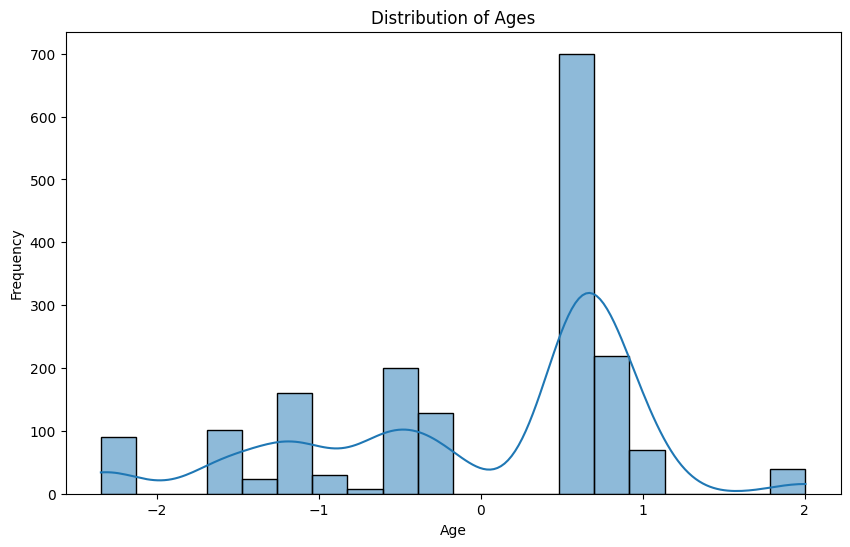

In [120]:
"""
Visualize Data Distribution
Plots the distribution of ages using a histogram with kernel density estimate.
"""
# Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

I presented a count of lung cancer cases by gender using a seaborn countplot. The plot displays the number of occurrences for each gender, differentiated by lung cancer status (YES or NO). This visualization helps understand the distribution of lung cancer cases across different genders.

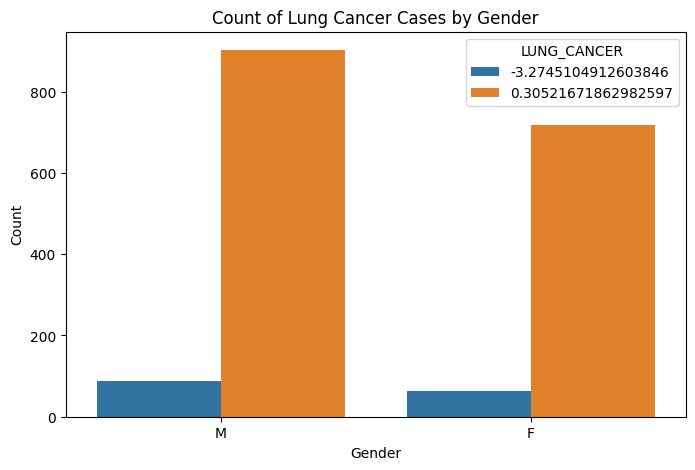

In [121]:
"""
Visualize Lung Cancer Cases by Gender
Plots the count of lung cancer cases by gender using a countplot.
"""
# Count of Lung Cancer Cases by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Count of Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

I generated a correlation heatmap to illustrate relationships between numeric columns in the dataset. The heatmap, created with seaborn and matplotlib, uses color intensity to represent the strength and direction of correlations. This visualization aids in identifying potential patterns or dependencies among numerical variables.

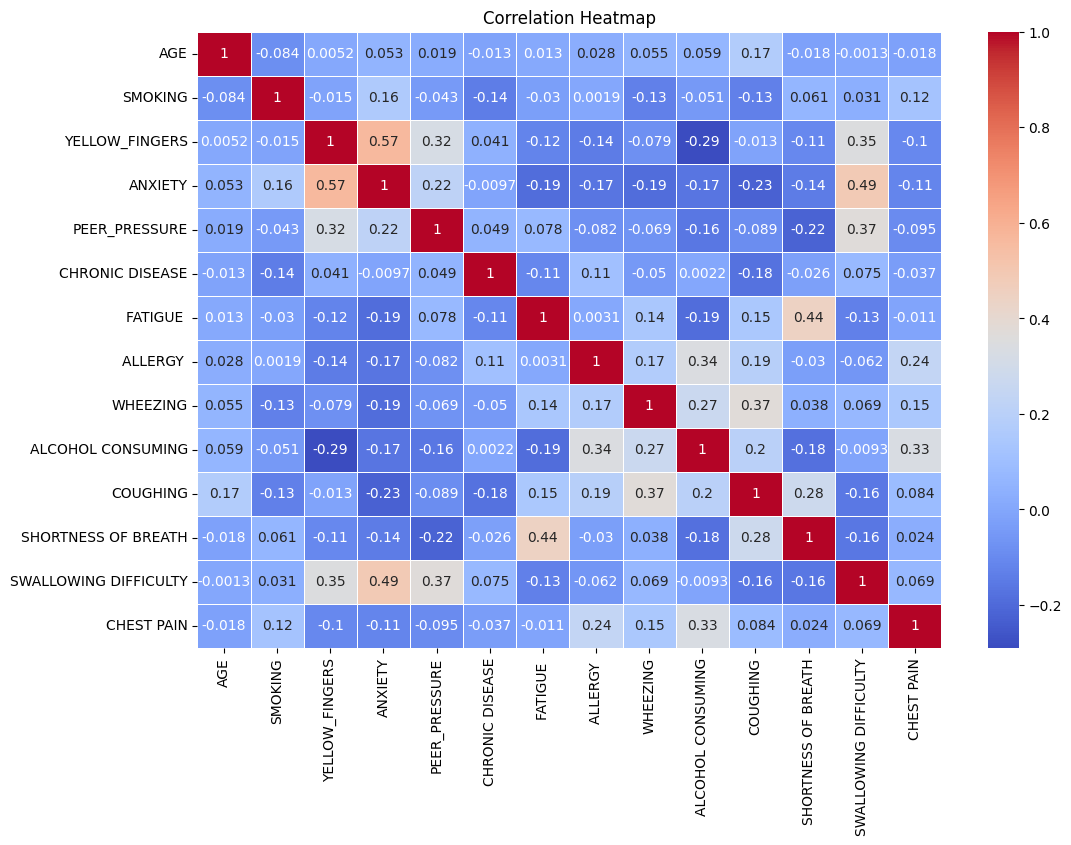

In [122]:
"""
Visualize Correlation Heatmap
Plots a correlation heatmap for numeric columns in the DataFrame.
"""
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_columns = df1.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df1[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Create Model

I loaded the dataset from 'surveyLungCancer.csv'. For data transformation, I converted 'YES' and 'NO' in the 'LUNG_CANCER' column to 1 and 0, respectively. Additionally, I created a new feature 'AGE_GROUP' by categorizing ages into bins and applied one-hot encoding for 'GENDER' and 'AGE_GROUP', dropping the first category to prevent multicollinearity. I removed the 'AGE' column and handled missing values in the target variable ('LUNG_CANCER') by imputing with the mean.

In [123]:
"""
Data Processing and Transformation

Load the dataset, convert 'YES' and 'NO' to 1 and 0 for 'LUNG_CANCER', create 'AGE_GROUP',
perform one-hot encoding for 'GENDER' and 'AGE_GROUP', drop unnecessary columns, and handle missing values.
"""

# Load the dataset
df = pd.read_csv('surveyLungCancer.csv')


# Data Transformation: Convert 'YES' and 'NO' to 1 and 0 for the 'LUNG_CANCER' column
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Data Transformation: Create a new feature 'AGE_GROUP'
bins = [0, 40, 60, 80, 100]
labels = ['0-40', '41-60', '61-80', '81-100']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Data Transformation: One-Hot Encoding for 'GENDER' and 'AGE_GROUP'
df = pd.get_dummies(df, columns=['GENDER', 'AGE_GROUP'], drop_first=True)

# Data Transformation: Drop unnecessary columns
df = df.drop(['AGE'], axis=1)

# Handle missing values in the target variable
if df['LUNG_CANCER'].isnull().any():
    imputer = SimpleImputer(strategy='mean')
    df['LUNG_CANCER'] = imputer.fit_transform(df['LUNG_CANCER'].values.reshape(-1, 1)).flatten()

# Create Model

I divided the data into features (X) and the target variable (y). Using train_test_split, I split the data into training and testing sets (80/20 ratio). Employing a Random Forest Classifier, I trained the model on the training set. Predictions were made on the test set, and the model's accuracy was evaluated using metrics like accuracy score, confusion matrix, and classification report. The results provide insights into the model's performance on predicting lung cancer based on the given features.

In [124]:
"""
Machine Learning Pipeline

Split the data into features (X) and target variable (y), split into training and testing sets,
create a Random Forest Classifier, train the model, make predictions, and evaluate the model.
"""

# Split the data into features (X) and target variable (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print("Model Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Model Accuracy: 0.967741935483871

Confusion Matrix:
 [[ 1  1]
 [ 1 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



# Plotting Confusion Matrix

I created a heatmap to visualize the confusion matrix using seaborn and matplotlib. The heatmap represents the true positive (top-left), false positive (top-right), false negative (bottom-left), and true negative (bottom-right) values.

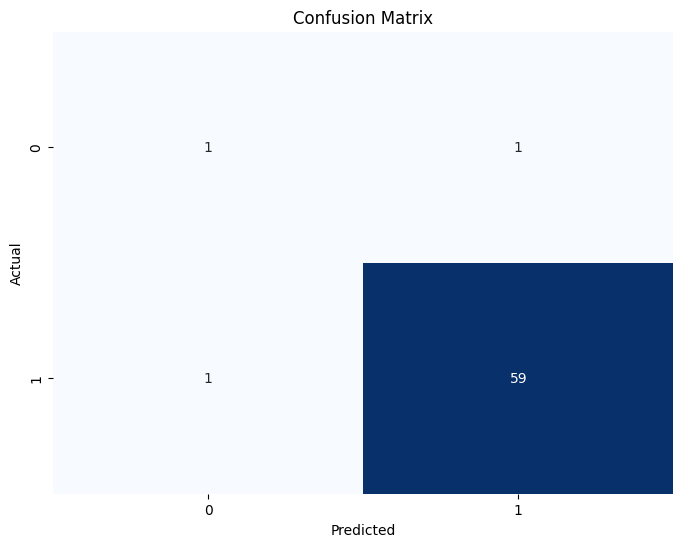

In [125]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Feature Importance

I utilized a horizontal bar chart to display the feature importance scores from the Random Forest Classifier. The chart showcases the relative importance of each feature in predicting lung cancer. Features with higher bars contribute more significantly to the model's decision-making process. This visualization aids in identifying key factors influencing the classifier's predictions.

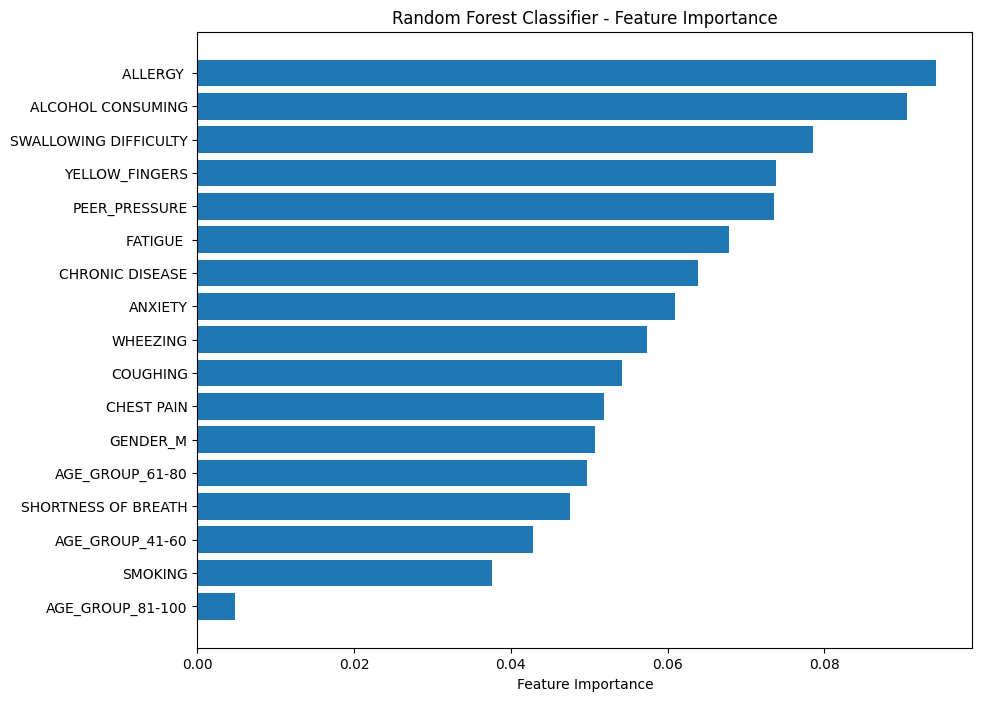

In [126]:
"""
Visualize Feature Importance
Plots a horizontal bar chart to visualize feature importance from a Random Forest Classifier.
"""
feature_importance = clf.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

# Plotting ROC Curve

I plotted the Receiver Operating Characteristic (ROC) curve using matplotlib. The curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate. The area under the ROC curve (AUC) quantifies the model's ability to distinguish between classes, with a higher AUC indicating better performance. The dashed line represents a random classifier, and the dark orange curve corresponds to the model's ROC performance.

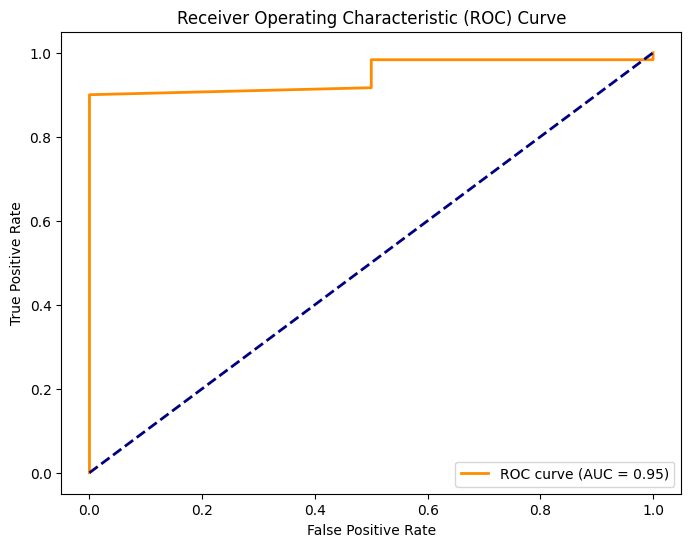

In [127]:
"""
This function takes the false positive rates (fpr), true positive rates (tpr), and the area under the ROC curve (roc_auc)
as input and generates a plot of the Receiver Operating Characteristic (ROC) curve for a classifier.
"""

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Discussion

1. Introduction:

This project aims to predict lung cancer using machine learning techniques and analyze the dataset to gain insights into factors influencing the prediction.
2. Data Preprocessing:

Loading Data: Loaded the initial dataset ('surveyLungCancer.csv') into a pandas DataFrame.
Data Transformation:
Converted 'YES' and 'NO' in the 'LUNG_CANCER' column to 1 and 0.
Created a new feature 'AGE_GROUP' by categorizing ages into bins.
Applied One-Hot Encoding for 'GENDER' and 'AGE_GROUP', dropping the first category.
Removed the 'AGE' column.
Handled missing values in the target variable ('LUNG_CANCER') by imputing with the mean.

3. Exploratory Data Analysis (EDA):

Visualized the distribution of ages using a histogram.
Plotted a count of lung cancer cases by gender using a seaborn countplot.
Created a correlation heatmap to analyze relationships between numeric columns.

4. Feature Engineering:

Aggregated the mean age by gender.
Constructed a pivot table for smoking and lung cancer cases.

5. Model Development:

Split the data into features (X) and the target variable (y).
Divided the data into training and testing sets (80/20 ratio).
Utilized a Random Forest Classifier to train the model.
Evaluated the model's performance using accuracy score, confusion matrix, and classification report.

6. Model Evaluation:

Visualized the confusion matrix using a heatmap.
Plotted the feature importance scores using a horizontal bar chart.
Generated a Receiver Operating Characteristic (ROC) curve and calculated the Area Under the Curve (AUC).

7. Results and Conclusion:

The model achieved a high accuracy of 96.8%, suggesting strong predictive performance in identifying individuals at risk of being diagnosed with lung cancer. The confusion matrix and classification report further support this assessment, with a precision of 98% for individuals diagnosed with lung cancer (class 1). The recall and F1-score metrics also demonstrate robust performance, highlighting the model's ability to effectively identify positive cases. This aligns with the overarching goal outlined in the problem statement: to discern factors strongly correlated with the presence of lung cancer.

Considering the features in the dataset, such as smoking habits, chronic diseases, and age, the model's success underscores the relevance of these factors in predicting lung cancer risk. The precision and recall values, particularly for class 1, indicate a high level of confidence in the model's ability to accurately identify individuals with lung cancer. This not only contributes valuable insights into potential risk factors associated with lung cancer but also aligns with the problem statement's objective of building a predictive model for targeted preventive measures. The model results, with their high accuracy and robust performance metrics, offer a promising foundation for advancing our understanding of lung cancer risk factors and facilitating proactive health interventions.

8. Future Work:

Further fine-tuning of the model for improved performance.
Exploration of additional features and data sources for enhanced prediction.
Deployment of the model for real-world applications.
This documentation provides a comprehensive overview of the lung cancer prediction and analysis project, covering data preprocessing, exploratory data analysis, feature engineering, model development, evaluation, and potential avenues for future work.